# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_crypto_v3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

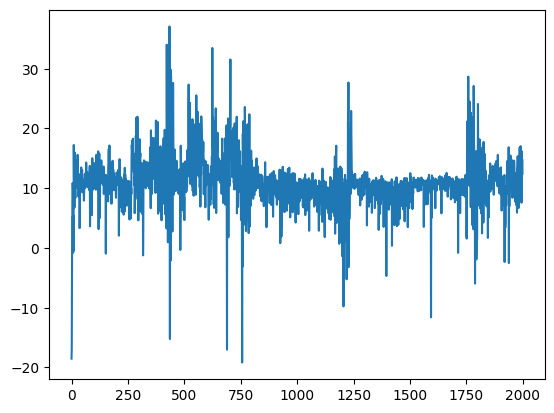

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-18.522701257846027, -17.039736039821864, -6.598672375384003, 5.121334259711727, 5.136311368080427, 10.873206470432294, 9.456319498917983, -0.7986560565799591, 5.384630754799322, -0.5047123122742653, 17.240674574195634, 11.726600513282143, 9.369602720035006, 6.767102592052993, 15.972659951411822, 11.423537942027814, 9.926962943873606, 8.373054186143404, 13.684591690270688, 14.498199941979236]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-38.86836617368543, -25.80080092328018, -32.304646611110996, -22.57606074788056, -33.2204578369121, -40.35757897057954, -23.56276441536898, -20.474632399420194, -31.323982540221145, -21.86313883610238, -23.209038259295085, -46.359488357783206, -23.673604671200785, -44.634344500492034, -17.531558557031083, -39.615523722237846, -28.535781791677003, -27.400765807825834, -29.734000696610412, -41.041391336843404]


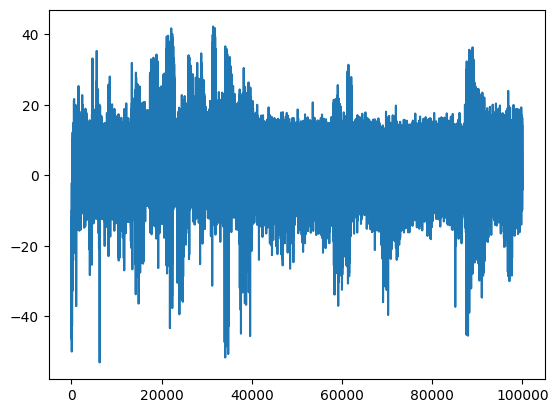

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

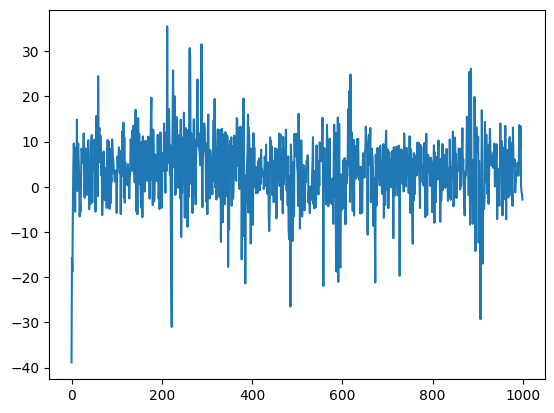

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

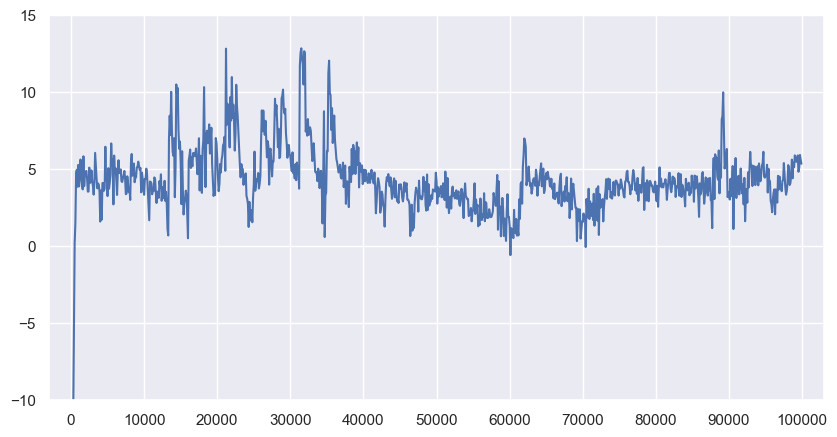

In [17]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-10,15)

plt.savefig("score_simple_crypto_v3.png")
plt.show()

In [12]:
score[1:101].mean()

0   -30.145553
dtype: float64